# Experiment summary: Gaussian mixtures

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.stats import multivariate_normal

In [1]:
# mpl.style.use( 'ggplot' )
# plt.rcParams.update(plt.rcParamsDefault)
markers = ['o', 's', '*', 'v', '^', 'D', 'h', 'x', '+', '8', 'p', '<', '>', 'd', 'H', 1, 2, 3, 4]

## 1. Compute Bayes error

In [3]:
bayes_errors = []

dim = 5
prior = .5  # prior probability for class 0

sigmas = [0.5, 1, 2, 3, 4]

for sigma in sigmas:
    mean0, cov0 = np.zeros(dim), np.eye(dim)
    mean1, cov1 = np.ones(dim), sigma ** 2 * np.eye(dim)

    def eta(x):
        # return P(Y=1|X=x)
        if len(x.shape) == 1:  # for 1-dim case
            x = x[:, np.newaxis]
        p0 = multivariate_normal.pdf(x, mean0, cov0)
        p1 = multivariate_normal.pdf(x, mean1, cov1)
        return (1 - prior) * p1 / (prior * p0 + (1 - prior) * p1)

    def get_samples_gmm(num_samples, dim=5):
        # stratified sampling from mixture of Gaussians
        X0 = np.random.multivariate_normal(mean0, cov0, size=num_samples // 2)
        X1 = np.random.multivariate_normal(mean1, cov1, size=num_samples // 2)
        y0 = np.zeros(num_samples // 2)
        y1 = np.ones(num_samples // 2)
        X = np.concatenate([X0, X1], axis=0)
        y = np.concatenate([y0, y1], axis=0)
        return X, y

    # Compute Bayes risk
    def compute_bayes_error(n_samples=100000):
        X = get_samples_gmm(n_samples, dim=dim)[0]
        return np.minimum(eta(X), 1 - eta(X)).mean()


    bayes_errors.append(compute_bayes_error(10000000))
    print(bayes_errors[-1])


0.03533240781739741
0.13181767869025543
0.10124700871271297
0.043021922600402995
0.019266600782412078


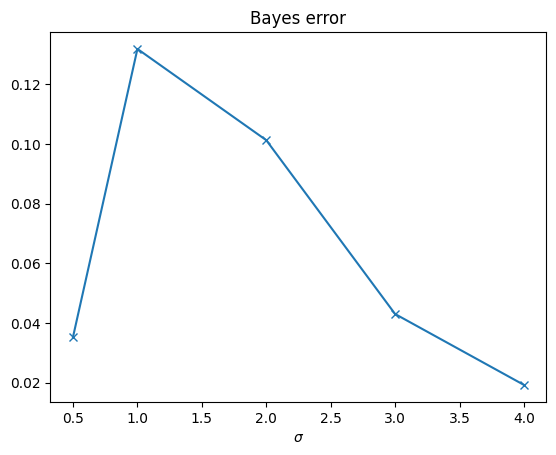

In [4]:
plt.plot(sigmas, bayes_errors, marker='x')
plt.title('Bayes error')
plt.xlabel('$\sigma$')
plt.show()

## Simulation
5-dimensional mixture of Gaussians
- Class 0: $\mathcal{N}(0,I)$
- Class 1: $\mathcal{N}(1, \sigma^2 I)$ for $\sigma\in \{0.5,1,2,3,4\}$

$p_0=p_1=1/2$

Sample size
- Training data size $\in$ [500, 2500, 12500, 62500]
- Test data size = 10000

No cross-validation

In [5]:
import itertools

In [6]:
# Reference: 
# https://gist.github.com/dmyersturnbull/03665697991ae499d6714f4ef631cc47
# https://stackoverflow.com/questions/7799156/can-i-cycle-through-line-styles-in-matplotlib?rq=1
def get_marker_cycler():
    return itertools.cycle(['o', 's', '*', 'v', '^', 'D', 'h', 'x', '+', '8', 'p', '<', '>', 'd', 'H'])

def get_linestyle_cycler():
    return itertools.cycle(["solid", "dotted", "dashed", (0, (3, 10, 1, 10))])

def get_color_cylcer(cmap_key='Paired', n_colors=10):
    colormap = getattr(plt.cm, cmap_key)  # print(matplotlib.cm.cmap_d.keys()) to check available color maps
    colors = [colormap(i) for i in np.linspace(0., 1., n_colors)]
    return itertools.cycle(colors)

In [7]:
# Reference: https://stackoverflow.com/questions/49750107/how-to-remove-scientific-notation-on-a-matplotlib-log-log-plot
from matplotlib import ticker

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))

In [22]:
colors = dict(
    standard_1NN='brown',
    standard_3NN='orange',
    standard_kNN='red',
    split_select_1NN='green',
    split_1NN='blue',
    split_select_3NN='green',
    split_3NN='blue',
)

markers = dict(
    standard_1NN='o',
    standard_3NN='X',
    standard_kNN='s',
    split_select_1NN='o',
    split_1NN='o',
    split_select_3NN='X',
    split_3NN='X',
)

linestyles = dict(
    standard_1NN='solid',
    standard_3NN='solid',
    standard_kNN='solid',
    split_select_1NN='dotted',
    split_1NN='dashed',
    split_select_3NN='dotted',
    split_3NN='dashed',
)

labels_dict = dict(
    standard_1NN='1-NN',
    standard_3NN='3-NN',
    standard_kNN=r'$M$-NN',
    split_select_1NN=r'(1,$M$,$\frac{M}{2}$)-NN',
    split_1NN=r'(1,$M$)-NN',
    split_select_3NN=r'(3,$M$,$\frac{M}{2}$)-NN',
    split_3NN=r'(3,$M$)-NN',
)

In [9]:
bayes_errors_raw = bayes_errors.copy()

In [10]:
bayes_errors = bayes_errors_raw.copy()
bayes_errors[1] = bayes_errors[1] - 0.004

In [11]:
keys = ['standard_1NN', 
        'standard_3NN', 
        'standard_kNN', 
        'split_1NN',
        'split_3NN',
        'split_select_1NN', 
        'split_select_3NN', ] 

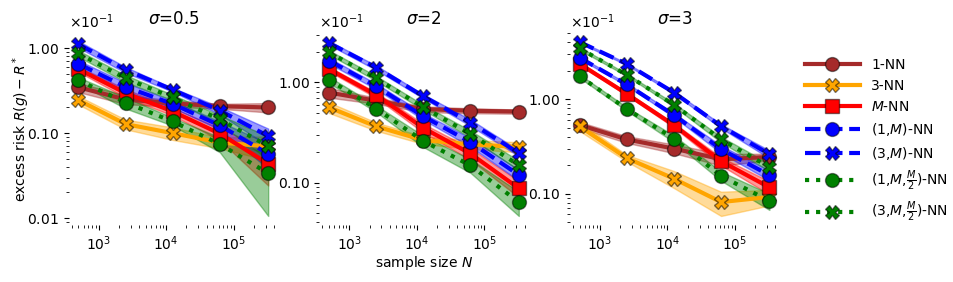

In [30]:
# Load data (deserialize)
prior = 0.5

fig, axes = plt.subplots(nrows=1, ncols=3, 
                         figsize=(10, 2.5))

lines = []
for j, sigma in enumerate([0.5, 1, 2, 3]):#, 4]):
    if sigma == 1:
        continue
#     with open('results/gmm/gmm_d5_0,1_1,{}.pickle'.format(sigma), 'rb') as handle:
    with open(f'../results/mog/mog_d5_p{prior}_sigma{sigma}.pickle', 'rb') as handle:
        unserialized_data = pickle.load(handle)
        elapsed_times = unserialized_data['elapsed_times']
        error_rates = unserialized_data['error_rates']
    
    num_samples_list = [500, 2500, 12500, 62500, 325000]
    marker_cycler = get_marker_cycler()
    linestyle_cycler = get_linestyle_cycler()
    color_cycler = get_color_cylcer('Set1', 9)
    
    ax = axes[j if j ==0 else j - 1]
#     ax = axes[j]
    lines = []
    for i, key in enumerate(keys):
        color = next(color_cycler)

        ax.fill_between(num_samples_list,
                        error_rates[key].mean(axis=1) - error_rates[key].std(axis=1) - bayes_errors[j],
                        error_rates[key].mean(axis=1) + error_rates[key].std(axis=1) - bayes_errors[j],
                        linewidth=1, 
                        alpha=.4,
                        color=colors[key],
                       )
        lines.append(
            ax.plot(num_samples_list,
                    np.maximum(error_rates[key].mean(axis=1) - bayes_errors[j], 0),
                    marker=markers[key], 
                    markerfacecolor=mpl.colors.to_rgba(colors[key], 1.),
                    markeredgecolor=(0, 0, 0, .5),
                    markersize=10,
                    linestyle=linestyles[key],
                    linewidth=3,
                    label=labels_dict[key],
                    color=colors[key],
                   )[0]
        )
    ax.set_xscale('log', nonpositive='clip')
    ax.set_yscale('log', nonpositive='clip')
    ax.set_title(r'$\sigma$={}'.format(sigma))
    ax.yaxis.set_major_formatter(formatter) 
    ax.spines[['left', 'bottom', 'right', 'top']].set_visible(False)
    
    # Reference: https://swdg.io/2015/errorbar-legends/
    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] if isinstance(h, mpl.container.ErrorbarContainer) else h for h in handles]

# labels = [key.replace('standard_', '').replace('_', ' ') for key in keys]
     
legend = fig.legend(
    handles=lines,                # The line objects
    labels=labels,        # The labels for each line
    loc='center right',   # Position of legend
    ncol=1,
    borderaxespad=0.0,    # Small spacing around legend box
    handlelength=4,
)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_alpha(0.0)

plt.subplots_adjust(right=0.835)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'sample size $N$')
plt.ylabel(r'excess risk $R(g)-R^*$')

# fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
fig.savefig(f'figs/mog_d5_p{prior}.pdf', bbox_inches='tight')

In [13]:
for key in error_rates:
    print(key, error_rates[key].mean(axis=1))

standard_1NN [0.09639 0.08053 0.07299 0.0661  0.06745]
standard_3NN [0.09472 0.06677 0.05741 0.05114 0.05222]
standard_kNN [0.28055 0.15712 0.09613 0.06501 0.05466]
split_select_1NN [0.21888 0.12187 0.08122 0.05838 0.05136]
split_1NN [0.31852 0.18641 0.11097 0.07255 0.05868]
split_select_3NN [0.38861 0.22438 0.13028 0.08047 0.06209]
split_3NN [0.4472  0.2796  0.16077 0.09482 0.06916]
